# Electron Tag and Probe using the J/psi meson

- Repository: https://github.com/ku-cms/LeptonStudies
- CERN SWAN platform: https://swan.cern.ch/
- CERN SWAN info: https://swan.web.cern.ch/swan/
- NANO AOD documentation page: https://cms-nanoaod-integration.web.cern.ch/autoDoc/
- CMS Data Aggregation System (DAS): https://cmsweb.cern.ch/das/

In [1]:
# import libraries
import uproot
from glob import glob
import awkward as ak
import numpy as np
from coffea.nanoevents import NanoEventsFactory

# plotting libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep

# set up mplhep
mplhep.style.use(mplhep.style.CMS)

In [2]:
# run this again to make sure the figure size updates (a known bug)
mplhep.style.use(mplhep.style.CMS)

In [20]:
# Load dataset files

base_directory = "/eos/user/c/caleb/CMS/datasets"

# Data (Muon trigger)
data_files = sorted(glob(f"{base_directory}/2023_Data/Muon0_Run2023C-22Sep2023_v1-v1_NANOAOD/*.root"))

n_data_files = len(data_files)
example_data_file = data_files[0]
open_data_file = uproot.open(example_data_file)

print("Number of Muon Data files: {0}".format(n_data_files))
print("Example data file path:")
print(example_data_file)
print("Example data file info:")
dict(open_data_file)

Number of Muon Data files: 90
Example data file path:
/eos/user/c/caleb/CMS/datasets/2023_Data/Muon0_Run2023C-22Sep2023_v1-v1_NANOAOD/01e84393-6b2e-4d57-87a4-f71475c051a2.root
Example data file info:


{'tag;1': <TObjString 'untagged' at 0x7efc6b8e34a0>,
 'Events;1': <TTree 'Events' (1623 branches) at 0x7efc6b575a60>,
 'LuminosityBlocks;1': <TTree 'LuminosityBlocks' (5 branches) at 0x7efc6b8d06d0>,
 'Runs;1': <TTree 'Runs' (1 branches) at 0x7efce4634f10>,
 'MetaData;1': <TTree 'MetaData' (1 branches) at 0x7efc6b8d0cd0>,
 'ParameterSets;1': <TTree 'ParameterSets' (1 branches) at 0x7efc6bf2df10>}

In [4]:
# Create NanoEventsFactory objects
data_events = NanoEventsFactory.from_root(example_data_file).events()

In [5]:
# Print:
# - number of events
# - number of electrons
# - number of muons

# variables
n_events    = 0
n_electrons = 0
n_muons     = 0

# Data
n_events    = len(data_events.run)
n_electrons = len(ak.flatten(data_events.Electron))
n_muons     = len(ak.flatten(data_events.Muon))

# per event (on average)
n_electrons_per_event = n_electrons / n_events
n_muons_per_event     = n_muons / n_events

print("Sample: Muon Data 2023")
print(" - Number of events: {0}".format(n_events))
print(" - Number of electrons: total = {0}, per event (avg.) = {1:.2f}".format(n_electrons, n_electrons_per_event))
print(" - Number of muons: total = {0}, per event (avg.) = {1:.2f}".format(n_muons, n_muons_per_event))


Sample: Muon Data 2023
 - Number of events: 1032791
 - Number of electrons: total = 254635, per event (avg.) = 0.25
 - Number of muons: total = 1822803, per event (avg.) = 1.76


(array([4.0000e+00, 4.0000e+00, 8.0000e+00, 7.0000e+00, 7.0000e+00,
        6.0000e+00, 8.0000e+00, 1.1000e+01, 1.1000e+01, 1.1000e+01,
        1.6000e+01, 1.8000e+01, 1.9000e+01, 1.7000e+01, 1.1000e+01,
        1.9000e+01, 1.7000e+01, 2.2000e+01, 3.0000e+01, 3.3000e+01,
        3.2000e+01, 3.8000e+01, 5.6000e+01, 8.0000e+01, 1.1600e+02,
        4.0790e+03, 2.3855e+04, 2.7411e+04, 2.6523e+04, 2.9840e+04,
        3.1114e+04, 3.1360e+04, 3.0622e+04, 3.3909e+04, 3.6127e+04,
        4.0688e+04, 4.3818e+04, 4.7165e+04, 4.7916e+04, 4.6844e+04,
        4.3751e+04, 4.2109e+04, 4.2562e+04, 4.1170e+04, 4.0391e+04,
        4.1467e+04, 4.1186e+04, 3.3722e+04, 3.6959e+04, 4.1007e+04,
        4.0752e+04, 3.7056e+04, 3.4153e+04, 4.1637e+04, 4.2269e+04,
        4.0935e+04, 4.1405e+04, 4.2885e+04, 4.2896e+04, 4.5367e+04,
        4.7354e+04, 4.8497e+04, 4.7681e+04, 4.4258e+04, 4.0299e+04,
        3.6550e+04, 3.4279e+04, 3.1342e+04, 3.2384e+04, 3.1303e+04,
        2.9388e+04, 2.6802e+04, 2.7880e+04, 2.44

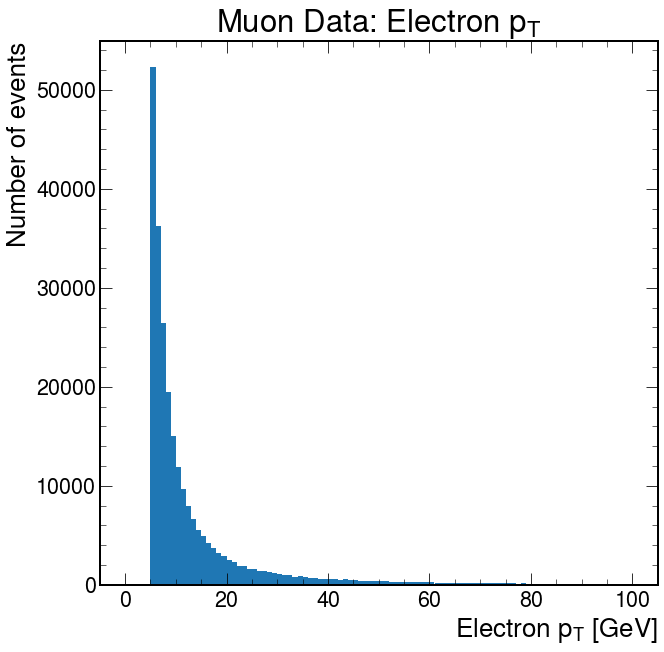

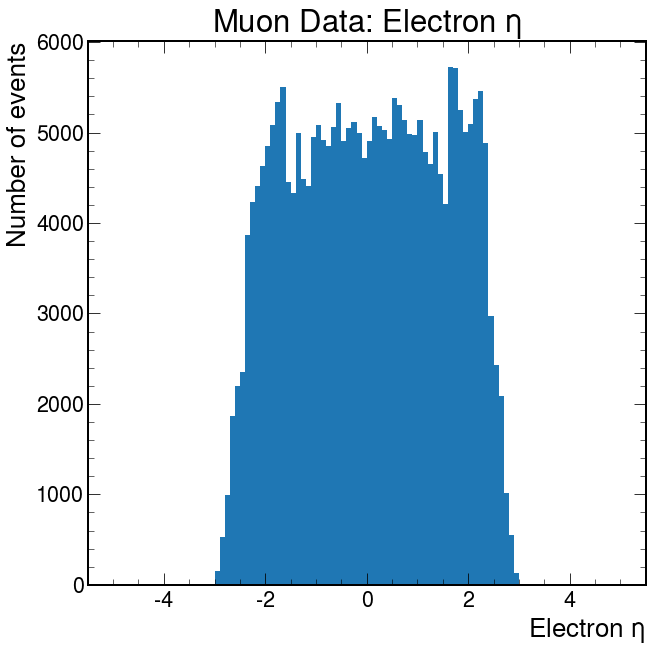

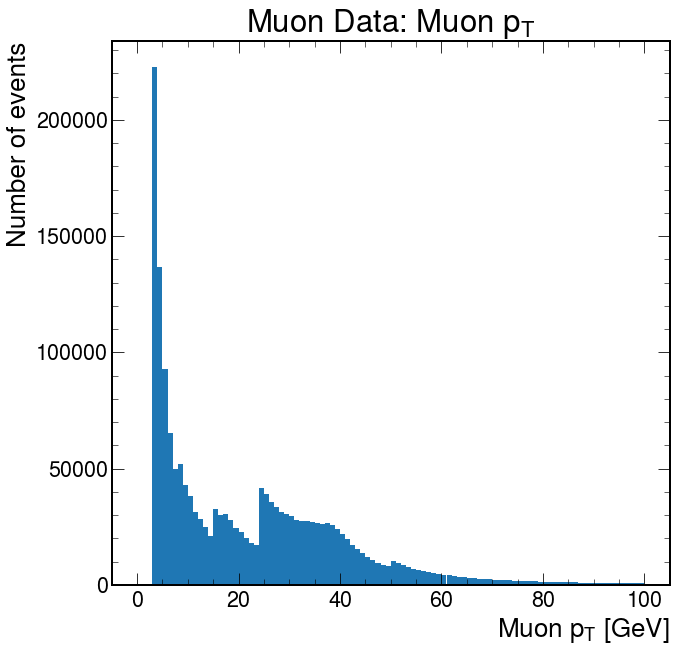

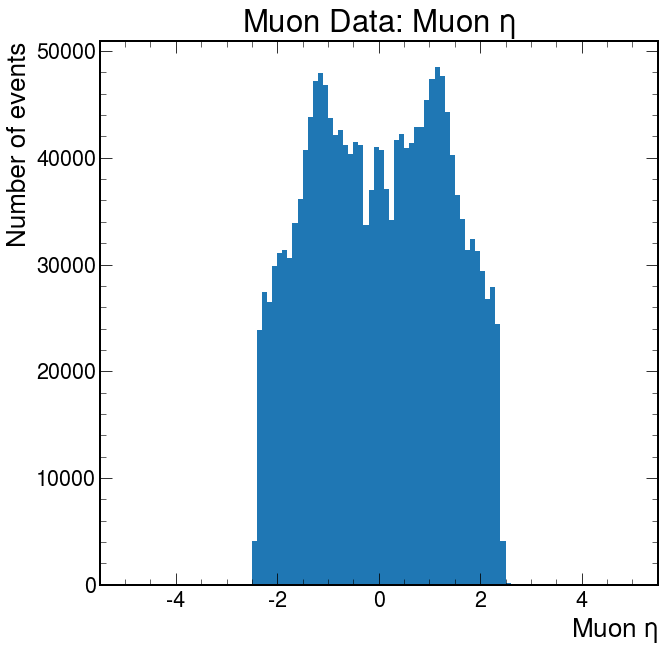

In [19]:
# Muon Data

# Electron pT
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Electron $p_{T}$")
ax.set_xlabel(r"Electron $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.pt), bins=np.linspace(0, 100, 101))

# Electron eta
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Electron $\eta$")
ax.set_xlabel(r"Electron $\eta$")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.eta), bins=np.linspace(-5, 5, 101))

# Muon pT
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Muon $p_{T}$")
ax.set_xlabel(r"Muon $p_{T}$ [GeV]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Muon.pt), bins=np.linspace(0, 100, 101))

# Muon eta
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Muon $\eta$")
ax.set_xlabel(r"Muon $\eta$")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Muon.eta), bins=np.linspace(-5, 5, 101))


(array([  1711.,   1785.,   1955.,   2122.,   2308.,   2747.,   3170.,
          3780.,   4859.,   6129.,   7659.,   9918.,  12886.,  16296.,
         20143.,  24279.,  28410.,  32124.,  35324., 672286., 666905.,
         35337.,  32176.,  28187.,  24025.,  19833.,  16322.,  13000.,
         10046.,   7687.,   6010.,   4650.,   3888.,   3146.,   2708.,
          2330.,   2225.,   2034.,   1807.,   1867.]),
 array([-20., -19., -18., -17., -16., -15., -14., -13., -12., -11., -10.,
         -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.]),
 <BarContainer object of 40 artists>)

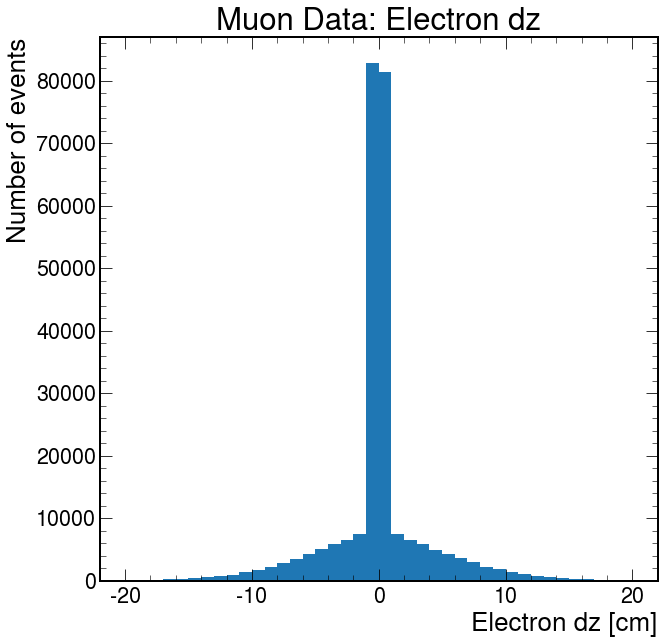

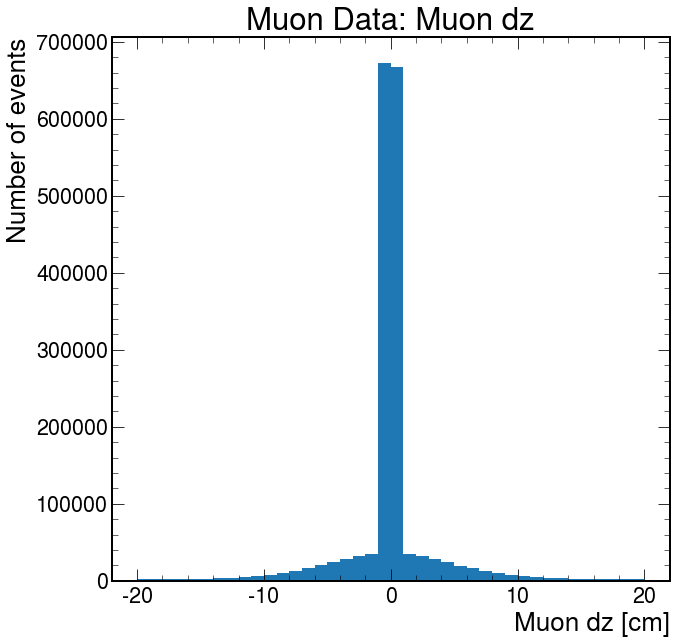

In [12]:
# Muon Data

# Electron dz
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Electron dz")
ax.set_xlabel(r"Electron dz [cm]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Electron.dz), bins=np.linspace(-20, 20, 41))

# Muon pT
fig, ax = plt.subplots()
ax.set_title(r"Muon Data: Muon dz")
ax.set_xlabel(r"Muon dz [cm]")
ax.set_ylabel(r"Number of events")
ax.hist(ak.flatten(data_events.Muon.dz), bins=np.linspace(-20, 20, 41))
